## Linear Regression on E-commerce Customer Data

We will try to fit a linear regression model on E-commerce Data and try to predict the Yearly amount spent by a customer.

In [142]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [143]:
customers = pd.read_csv('Ecomm-Customers.csv')

In [144]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


 info() tells us that there are 8 columns and 500 rows . Let us peak into the data using head()

In [145]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Using pairplot to see if there is some sort of correlation among columns with respect to yearly amount spent.

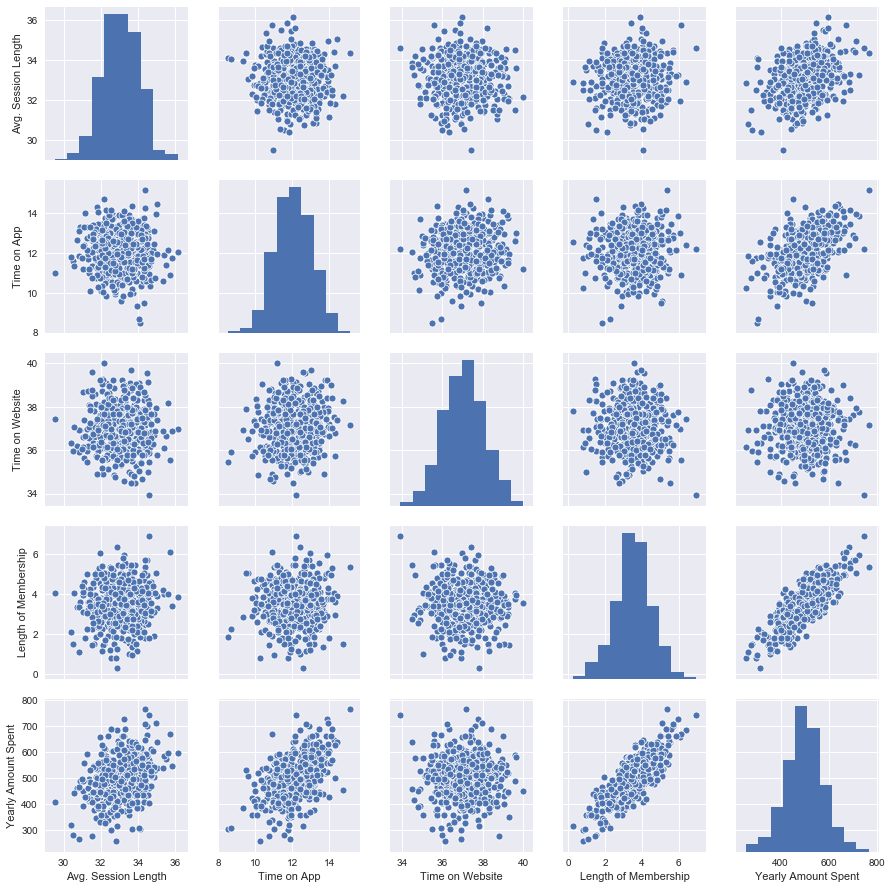

In [146]:
sns.pairplot(customers)

From the pair plots, we can see that data distribution is quite normal, and that there is a clear correlation between length of membership and yearly amount spent.<br>
Let us find out more using heatmap

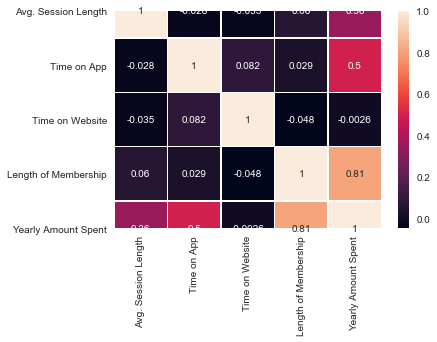

In [147]:
sns.heatmap(customers.corr(), linewidth=0.5, annot=True)

The above heatmap confirms the correlation between 'length of membership' and 'Yearly amount spent'. We can also see that there is good degree of correlation between 'Yearly amount spent' and the column 'Time on app'. Also lesser degree of correlation with 'Avg. Session length'

In [148]:
x = customers[['Time on App', 'Length of Membership']]
y = customers['Yearly Amount Spent']

For the time being let's skip 'Avg. Session Length' column since it has lesser correlation. We shall include it later and see if it yields considerably better results.

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

Splitting dataset into train and test , giving 30% as test data and 70% as train data

In [150]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# Function to Plot Learning curve
def plot_lc(estimator, x, y, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(lm,x,y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curve', fontsize = 18, y = 1.03)
    plt.legend()

In [152]:
print("Coeffs are Time on App : {0} , Length of Membership: {1}".format(lm.coef_[0], lm.coef_[1]))
print("Intercept : ",lm.intercept_)

Coeffs are Time on App : 37.24859675165942 , Length of Membership: 62.76419727475292
Intercept :  -172.29634898449677


In [153]:
result = lm.predict(x_test)

Text(0, 0.5, 'Predicted values')

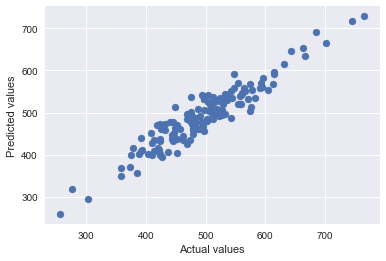

In [154]:
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

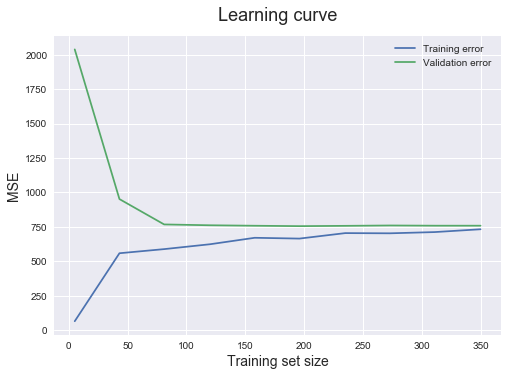

In [155]:
plot_lc(lm,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

Learning curve for the linear regression model shows small gap between training and validation error, meaning that variance should be reduced.  

In [156]:
print('R2 score : ',metrics.r2_score(y_test, result))
print('Variance: ',metrics.explained_variance_score(y_test,result))
print('MSE: ', metrics.mean_squared_error(y_test,result))

R2 score :  0.8881506494029392
Variance:  0.8895559640312203
MSE:  711.9352710839121


The predicted values and actual values seem to be agreeing with each other and the R2 score is also ~ 0.88, which is seems good enough. But the MSE seems to be higher .
However, Let us add the column 'Avg. Session length' this time and check results to see if there's any improvement (if R2 score increases and MSE decreases).

In [157]:
x = customers[['Time on App', 'Length of Membership','Avg. Session Length']]

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

Splitting dataset into train and test , giving 30% as test data and 70% as train data

In [159]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
print("Coeffs are Time on App : {0} , Length of Membership: {1} , Avg. Session Length: {2}".format(lm.coef_[0], lm.coef_[1], lm.coef_[2]))
print("Intercept : ",lm.intercept_)

Coeffs are Time on App : 38.74012697347563 , Length of Membership: 61.779801807105294 , Avg. Session Length: 25.66375684798914
Intercept :  -1034.1551554733614


In [161]:
result = lm.predict(x_test)

Text(0, 0.5, 'Predicted values')

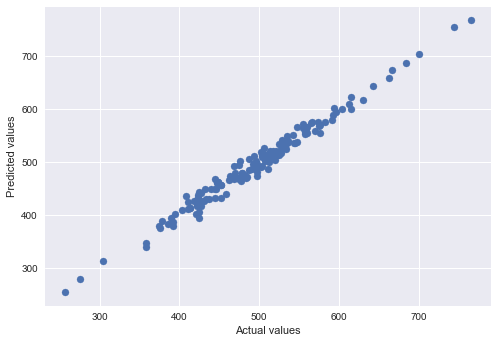

In [162]:
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

This time , the predicted vs actual values is giving a leaner graph, which is better. Lets look further into R2 score and MSE.

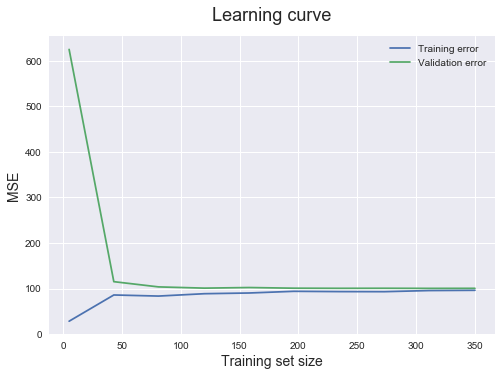

In [163]:
plot_lc(lm,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

Learning curve for the linear regression model shows that the gap between training and validation error has reduced, meaning that variance is further reduced.

In [164]:
print('R2 score : ',metrics.r2_score(y_test, result))
print('Variance: ',metrics.explained_variance_score(y_test,result))
print('MSE ', metrics.mean_squared_error(y_test,result))

R2 score :  0.9813533752076671
Variance:  0.9813536018865052
MSE  118.68812653328345


Addition of the column 'Avg. Session Length' has greatly improved the model for us with increased R2 score of 0.981 and reduced MSE of 118.68